In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class EulerMaruyama:

    def __init__(self, dt, T0, v0, T1, nk=1):
        self.dt = dt  # Time step.
        self.T0 = T0
        self.T1 = T1
        self.T = T1 - T0 # Total time.
        self.v0 = v0
        self.nt = int(self.T / dt)  # Number of time steps.
        self.sqrtdt = np.sqrt(dt)
        self.nk = nk
        self.rng=np.random.RandomState(100)


    @property
    def tvalues(self):
        return np.linspace(self.T0, self.T1, num=self.nt)

    @property
    def tstep(self):
        return self.dt
    
    def __call__(self, mu, sigma):
        x = np.zeros((self.nt, self.nk))
        etas = self.rng.randn(*x.shape)
        x[0, :]=self.v0
        for i in range(self.nt - 1):
            x[ i + 1, :] = x[i, :] + mu*x[i, :]*dt  + \
            sigma*x[i, :] * self.sqrtdt * etas[i, :]
        return x

In [3]:
sigma = 0.1  # Standard deviation.
mu = 0.1  # Mean.

In [4]:
dt=.001

In [5]:
sampler = EulerMaruyama(dt=dt, T0=0, v0=1, T1=1)

In [6]:
walk = sampler(mu, sigma)
tvalues = sampler.tvalues


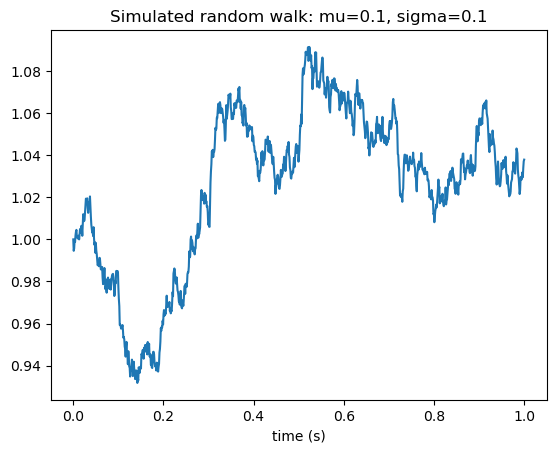

In [7]:
plt.plot(tvalues, walk)
plt.xlabel("time (s)")
plt.title(f"Simulated random walk: {mu=}, {sigma=}")
plt.show()

In [8]:
def calibrate_mu_sigma(data, dt):
    deltas =  (data[1:] - data[:-1] )/data[:-1]
    nt = deltas.shape[0]
    mu = (1.0/dt)*np.sum(deltas)/nt
    sigma2 = (1.0/dt)*np.sum(deltas**2)/nt
    return mu, np.sqrt(sigma2)

In [9]:
mu0, sigma0 = calibrate_mu_sigma(walk, dt)
print(f"{mu0=} whereas {mu=}")
print(f"{sigma0=} wheareas {sigma=}")

mu0=np.float64(0.04270392738338245) whereas mu=0.1
sigma0=np.float64(0.10455865846453488) wheareas sigma=0.1


In [10]:
def resample_walk(tvalues, data, resample_tpoints, mu, sigma, nsamples=5):
    nt = len(tvalues)
    Tstart = tvalues[0]
    Tend = tvalues[-1]
    dt = (Tend - Tstart)/len(tvalues)
    npoints = len(resample_tpoints)
    walks = np.tile(data[np.newaxis,:,:], (npoints, 1, nsamples))
    for ipoint, tpoint in enumerate(resample_tpoints):
        index= min(range(nt), key=lambda i: abs(tvalues[i] - tpoint))
        val = data[index]
        T = tvalues[index]
        sampler = EulerMaruyama(dt=dt, T0=T, v0=val, T1=Tend+dt, nk=nsamples)
        walks[ipoint, index:, :] = sampler(mu, sigma)
    return walks
        

In [11]:
resampled_tpoints = [0.25, 0.75]
resampled_walks = resample_walk(tvalues, walk, resampled_tpoints, mu= mu, sigma=sigma)
from matplotlib.colors import TABLEAU_COLORS, same_color

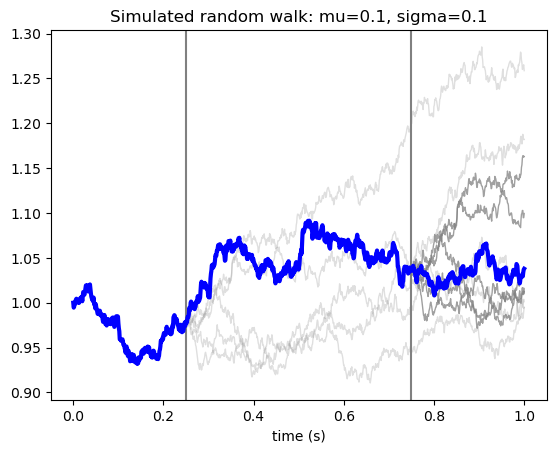

In [12]:
nwalk, nt, nsamples = resampled_walks.shape
tend = tvalues[-1]
colors = ["light_blue"]
for iwalk in range(nwalk):
    resampled = resampled_walks[iwalk, ...]
    t = resampled_tpoints[iwalk]
    alpha = t/tend 
    plt.plot(tvalues, resampled, alpha = alpha, color="grey", linewidth=1)
    plt.axvline(t, color="grey")
plt.plot(tvalues, walk, color="blue", linewidth=3)
plt.xlabel("time (s)")
plt.title(f"Simulated random walk: {mu=}, {sigma=}")
plt.show()